## Mathematical Principles in Pattern Recognition (2017/2018)
$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bb}{\mathbf{b}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$
$\newcommand{\bA}{\mathbf{A}}$
$\newcommand{\bQ}{\mathbf{Q}}$
$\newcommand{\bR}{\mathbf{R}}$
$\newcommand{\bX}{\mathbf{X}}$

# Lab 2

In the computer labs we will work with the Python programming language within a Jupyter notebook. Each week a new notebook is made available that contains the exercises that are to be handed-in. 

* You are expected to work in pairs.
* Only one of each pair has to submit on blackboard. Make sure that you add the student ID of your partner in the submission comments.
* The main notebook file you submit should read "Lab[number]_[last name 1]_[last name 2].ipynb", for example "Lab2_Bongers_Versteeg.ipynb". 
* Please make sure your code will run without problems!

Feel free ask any questions during the computer lab sessions, or email the TA, Elise (e.e.vanderpol@uva.nl).

**The due date for the labs is Friday, Sep 22 at 15:00**

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1 Simple linear regression
In this exercise, you will generate noisy data for a simple linear system $y = \beta_0 + \beta_1 x$ where we have one target and one predictor variable, and compute the solution of least-squares estimator using linear algebra.

### 1.1 Generate data
**[10 points]** Sample 20 datapoints $({x_i, y_i})$ for the following model: 
$$x \in \mathcal{N}(0, 3)$$
$$y = \beta_0 + \beta_1 x + \epsilon \mathrm{,}$$
where $\epsilon \in \mathcal{N}(0,1)$ is standard normal and the parameters $\beta_0$ and $\beta_1$ are both taken randomly __once__ in the interval $(0,1)$ (and are thus kept fixed during sampling!). Make a scatterplot of your data.

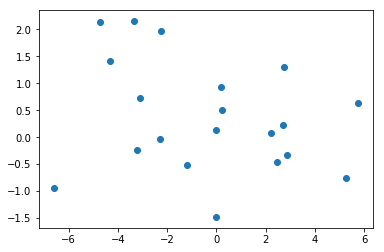

In [2]:
func = np.vectorize(np.random.normal)
data_size = 20
beta0 = np.random.random()
beta1 = np.random.random()

dataX = func(np.zeros(data_size),3)
noise = func(np.zeros(data_size),1)
dataY = (dataX*beta1) + beta0 + noise

plt.scatter(dataX,dataY)

### 1.2  LS solution
**[15 points]** What is the solution of the least-squares estimate for the parameters $\hat{\bb} = (\hat{\beta}_0, \hat{\beta}_1)$ for model $y = \beta_0 + \beta_1 x$ in terms of the dependent variable $y$ and the design matrix $\mathbf{X}$? Write the solutions to these normal equations down in closed form in the markdown cell below. What are the dimensions of $\hat{\bb}$, $\bX$ and $\by$? 

Hint: see Bishop chapter 3, it helps to write the model in vectorized form!

$$ \hat{b} = (X^t X)^{-1}X^T y $$

Dimensions:  
b: 2x1  
X: 20x2  
y: 20x1  

### 1.3 Compute estimates
**[10 points]** Create the design matrix $\bX$ and compute the point estimation for the parameters $\hat{\bb}$ using the simulated data from 1.1.

In [3]:
X = matrix([np.ones(data_size), dataX]).T
bHat = inv((X.T * X)) * X.T * matrix(dataY).T
bHat

matrix([[ 0.34697607],
        [-0.07981849]])

### 1.4 Plotting
**[5 points]** Plot the model with the estimated parameters and the true parameters in the same scatterplot as the original data. 

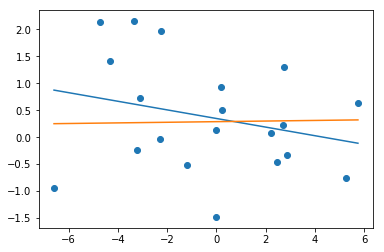

In [4]:
plt.scatter(dataX,dataY)
xPlot = linspace(amin(X), amax(X), 30)
plt.plot(xPlot, (bHat[0] + bHat[1]*xPlot).T)
plt.plot(xPlot, (beta0 + beta1*xPlot).T)

## 2 Multiple linear regression
Here we go from simple to multiple linear regression, and encounter some difficulties that may arise.

### 2.1 Repeating for multiple regression
**[30]** Sample now 20 datapoints from a more complex model with multiple prediction variables:
$$x_1 \in \mathcal{N}(0, 3)$$
$$x_2 \in \mathcal{N}(0, 2)$$
$$x_3 \in \mathcal{N}(0, 3)$$
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon \mathrm{,}$$
where $\epsilon$ is again standard normal and the $\beta_i$ are all randomly set in $(0,1)$. Repeat the above assignment by computing $\bX$ and the least squares estimate of the parameters $\hat{\bb}$. Print the results for  $\hat{\bb}$ and the original parameters $\bb$ together as a check.

Hint: if you vectorized the computation in 1.3 correctly, you could re-use some code.

In [49]:
data_size = 20

beta = matrix(random.random(size=4)).T

X = ones(shape=(4, data_size))
X[1] = func(np.zeros(data_size),3)
X[2] = func(np.zeros(data_size),2)
X[3] = func(np.zeros(data_size),3)
X = matrix(X.T)
noise = matrix(func(np.zeros(data_size),1)).T

Y = X*beta + noise
bHat = inv((X.T * X)) * X.T * Y
#print(bHat)
#print(beta)
print("Difference between bHat and the original beta: \n", bHat-beta)

Difference between bHat and the original beta: 
 [[ 0.30927286]
 [-0.04871065]
 [ 0.05540416]
 [-0.03200471]]


We have loaded some multivariate data, comprising of one target $y$ and 3 predictor variables $x_i$ as an example. 

In [52]:
## example data.
with load('data.npz', 'r') as f:
    x_example = np.load(f)['x']
    y_example = np.load(f)['y']
    designmatrix_example = np.load(f)['designmatrix']

FileNotFoundError: [Errno 2] No such file or directory: 'data.npz'

### 2.2 Example data
**[5 points]** Use the designmatrix $\bX$ and target variable $\by$ from the data loaded above in your implementation from problem 2 to get a least-square estimate for $\bb$ assuming a linear regression model. What happens, and why?

_[your answer here]_

We can factor any complex (and thus real-valued) $m \times n$ matrix $\bA$ in terms of an $m \times n$ orthogonal matrix $\bQ$ and an $n \times n$ upper triangular matrix $\bR$, a so-called QR decomposition.  
### 2.3 QR decomposition
**[10 points]** Rewrite the solution to the normal equations from 1.2 in terms of the QR decomposition of the designmatrix. Why could this form be more preferred?

_[your answer here]_

### 2.4 Implementation
There are many different methods to calculate the QR decomposition to find here we will use a modified Gram-Schmidt orthogonalization algorithm as seen below.

In [ ]:
def modified_gram_schmidt(mat):
    m, n = mat.shape
    
    q = np.zeros((m,n))
    r = np.zeros((n,n))

    for k in range(n):
        r[k, k]     = np.linalg.norm(mat[:, k])
        q[:, k]     = mat[:,k]/r[k,k]
        r[k, k+1:n] = np.dot(q[:,k], mat[:,k+1:n])
        mat[:, k+1:n] = mat[:,k+1:n] - np.outer(q[:,k], r[k,k+1:n])
    return q, r

**[10 points]** Explain __roughly__ why this algorithm would return an orthogonalized $\bQ$ (you are allowed to add comments to the code above). Apply it on the designmatrix of your example, show that the decomposition works and calculate an estimate $\hat{\bb}$.

## 2.5 Numpy
**[5 points]**  Use the least-squares implementation in _numpy_ on the example data to get the parameters for $\by = \bX \bb$  and compare with what you found in 2.2 and 2.4.